In [1]:
import time

import matplotlib.pyplot as plt
import mlrose_hiive
import numpy as np
from common import average_cross_arrays

In [2]:
random_state = 88
length = 80
num_states = 3

fitness = mlrose_hiive.FlipFlop()
problem = mlrose_hiive.DiscreteOpt(length=length, fitness_fn=fitness, maximize=True, max_val=num_states)
problem.set_mimic_fast_mode(True)
np.random.seed(random_state)
init_state = np.random.randint(num_states, size=length)
plot_fitness = {}
plot_time = {}

In [3]:
curve_list = []
fitness_list = []
run_time_list = []

for i in range(20):
  start = time.time()
  best_state, best_fitness, fitness_curve = mlrose_hiive.random_hill_climb(
    problem, 
    max_attempts=100, 
    max_iters=1000, 
    init_state=init_state, 
    curve=True,
    random_state=i*random_state,
  )
  end = time.time()
  run_time = end - start
  
  fitness_list.append(best_fitness)
  curve_list.append(fitness_curve[:, 0])
  run_time_list.append(run_time)

best_fitness = np.mean(fitness_list)
fitness_curve = average_cross_arrays(curve_list)
run_time = np.mean(run_time_list)

print(f"score: {best_fitness}")
print(f"time(s): {run_time}")
plot_fitness['rhc'] = fitness_curve
plot_time['rhc'] = run_time

score: 78.05
time(s): 0.01076366901397705


In [4]:
curve_list = []
fitness_list = []
run_time_list = []

for i in range(20):
  start = time.time()
  best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(
    problem, 
    max_attempts=100, 
    max_iters=1000, 
    init_state=init_state, 
    curve=True,
    random_state=i*random_state,
  )
  end = time.time()
  run_time = end - start
  
  fitness_list.append(best_fitness)
  curve_list.append(fitness_curve[:, 0])
  run_time_list.append(run_time)

best_fitness = np.mean(fitness_list)
fitness_curve = average_cross_arrays(curve_list)
run_time = np.mean(run_time_list)

print(f"score: {best_fitness}")
print(f"time(s): {run_time}")
plot_fitness['sa'] = fitness_curve
plot_time['sa'] = run_time

score: 79.0
time(s): 0.04874527454376221


In [5]:
curve_list = []
fitness_list = []
run_time_list = []

for i in range(20):
  start = time.time()
  best_state, best_fitness, fitness_curve = mlrose_hiive.genetic_alg(
    problem, 
    pop_size=1500,
    max_attempts=100, 
    max_iters=1000, 
    curve=True,
    random_state=i*random_state,
  )
  end = time.time()
  run_time = end - start
  
  fitness_list.append(best_fitness)
  curve_list.append(fitness_curve[:, 0])
  run_time_list.append(run_time)

best_fitness = np.mean(fitness_list)
fitness_curve = average_cross_arrays(curve_list)
run_time = np.mean(run_time_list)

print(f"score: {best_fitness}")
print(f"time(s): {run_time}")
plot_fitness['ga'] = fitness_curve
plot_time['ga'] = run_time

score: 79.0
time(s): 21.99192558526993


In [6]:
curve_list = []
fitness_list = []
run_time_list = []

for i in range(20):
  start = time.time()
  best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(
    problem, 
    pop_size=1500,
    max_attempts=100, 
    max_iters=1000, 
    curve=True,
    random_state=i*random_state,
  )
  end = time.time()
  run_time = end - start
  
  fitness_list.append(best_fitness)
  curve_list.append(fitness_curve[:, 0])
  run_time_list.append(run_time)

best_fitness = np.mean(fitness_list)
fitness_curve = average_cross_arrays(curve_list)
run_time = np.mean(run_time_list)

print(f"score: {best_fitness}")
print(f"time(s): {run_time}")
plot_fitness['mimic'] = fitness_curve
plot_time['mimic'] = run_time

score: 79.0
time(s): 27.307461965084077


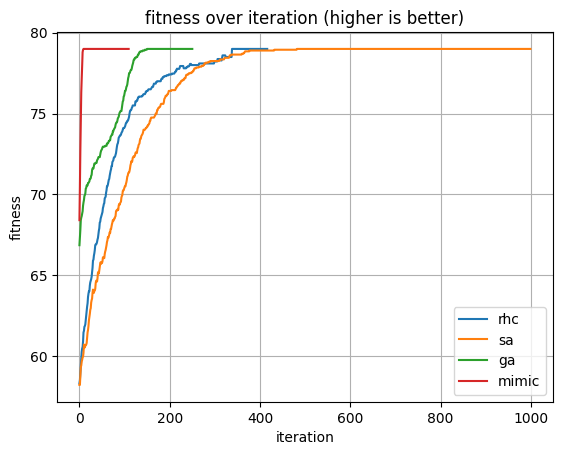

In [7]:
for k, v in plot_fitness.items():
  plt.plot(v, label=k)

plt.title('fitness over iteration (higher is better)')
plt.xlabel('iteration')
plt.ylabel('fitness')
plt.grid()
plt.legend()
plt.show()

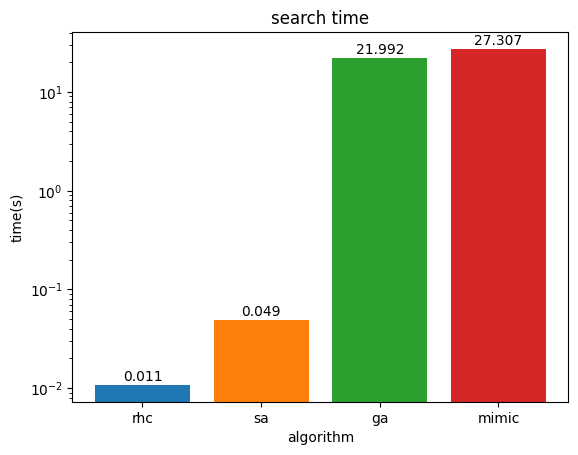

In [8]:
plt.bar(plot_time.keys(), plot_time.values(), color=plt.rcParams['axes.prop_cycle'].by_key()['color'])
for i, v in enumerate(plot_time.values()):
    plt.text(i, v*1.1, str(round(v, 3)), ha='center')

plt.title('search time')
plt.xlabel('algorithm')
plt.ylabel('time(s)')
plt.yscale('log')
plt.show()